In [195]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [196]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

No such comm: 2722a478dd2f48e3a73e79c3ae09cd0b


In [197]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.387,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta(0.0934,1.524,t)
    Jupiter = Planeta(0.0489,5.203,t)
    
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [198]:
dt = 0.001
tmax = 30
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [199]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [200]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 30000/30000 [00:05<00:00, 5307.37 Steps/s]


In [201]:
Planetas[1].GetPerihelio()

[0.552,
 1.167,
 1.782,
 2.3970000000000002,
 3.013,
 3.628,
 4.243,
 4.8580000000000005,
 5.473,
 6.089,
 6.704,
 7.319,
 7.934,
 8.549,
 9.164,
 9.78,
 10.395,
 11.01,
 11.625,
 12.24,
 12.855,
 13.471,
 14.086,
 14.701,
 15.316,
 15.931000000000001,
 16.547,
 17.162,
 17.777,
 18.392,
 19.007,
 19.622,
 20.238,
 20.853,
 21.468,
 22.083000000000002,
 22.698,
 23.313,
 23.929000000000002,
 24.544,
 25.159,
 25.774,
 26.389,
 27.005,
 27.62,
 28.235,
 28.85,
 29.465]

In [202]:
periodos = np.empty(len(Planetas), dtype=float)
semiejes = np.empty(len(Planetas), dtype=float)
for i in range(len(Planetas)):
    perihelios = Planetas[i].GetPerihelio()
    periodos[i] = perihelios[1]-perihelios[0]
    semiejes[i] = Planetas[i].a_**3

print("Periodos de los planetas")
print("Mercurio: ",periodos[0])
print("Venus: ",periodos[1])
print("Tierra: ",periodos[2])
print("Marte: ",periodos[3])
print("Jupiter: ",periodos[4])

Periodos de los planetas
Mercurio:  0.24099999999999996
Venus:  0.615
Tierra:  1.0010000000000001
Marte:  1.881
Jupiter:  11.867999999999999


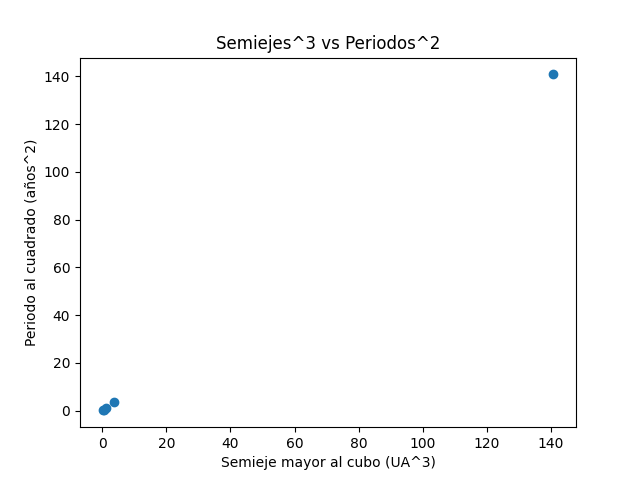

In [203]:
periodos = periodos**2

plt.plot(semiejes,periodos,'o')
plt.xlabel('Semieje mayor al cubo (UA^3)')
plt.ylabel('Periodo al cuadrado (años^2)')
plt.title('Semiejes^3 vs Periodos^2')
plt.show()

Pendiente (m): 0.9999839995686842
Intersección (b): 0.0004666604853696299


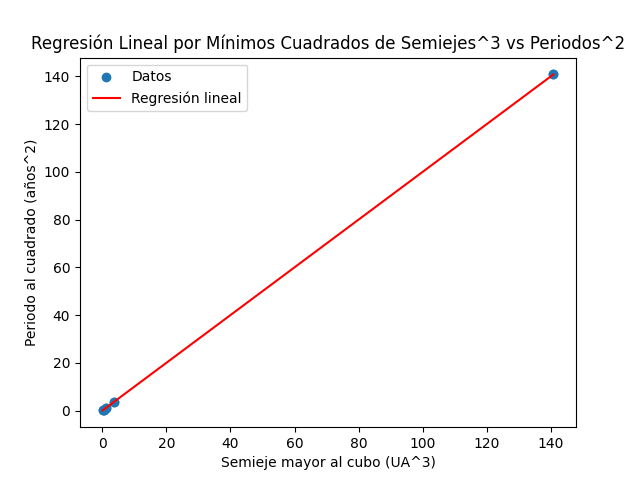

In [204]:
#implementamos minimos cuadrados

n = len(periodos)
m = (n * np.sum(semiejes * periodos) - np.sum(semiejes) * np.sum(periodos)) / (n * np.sum(semiejes**2) - (np.sum(semiejes))**2)
b = (np.sum(semiejes) - m * np.sum(semiejes)) / n

regresion = m * semiejes + b

print(f"Pendiente (m): {m}")
print(f"Intersección (b): {b}")

plt.scatter(semiejes, periodos, label='Datos')
plt.plot(semiejes, regresion, color='red', label='Regresión lineal')
plt.xlabel('Semieje mayor al cubo (UA^3)')
plt.ylabel('Periodo al cuadrado (años^2)')
plt.title('Regresión Lineal por Mínimos Cuadrados de Semiejes^3 vs Periodos^2')
plt.legend()
plt.show()

Recordemos que la tercera ley de Kepler está dada por:

$$
T^2 = \frac{4 \pi^2}{GM}a^3
$$

Por lo cual tenemos que la pendiente de la grafica es:

$$
m = \frac{4 \pi^2}{GM}
$$

Con lo cual la masa del sol debería ser:

$$
M = \frac{4 \pi^2}{Gm}
$$

In [205]:
G = 6.67430e-11 #cte gravitacional en m^3/kg/s^2

G0 = G*1000000/1000 #cm^3/kg/s^2

m1 = m*3.154e+14 #años a segundos
m1 = m1/1.496e+33 #UA a metros

m0 = m1*1000000 #m^3 a cm^3
m0 = m0/1000 #kg a g

masa_sol0 = 4*np.pi**2 / (G0*m0)
masa_sol = 4*np.pi**2 / (G*m1)

print("La masa del sol es: {:e} g (Gaussianas)".format(masa_sol0))
print("La masa del sol es: {:e} kg (SI)".format(masa_sol))

La masa del sol es: 2.805633e+24 g (Gaussianas)
La masa del sol es: 2.805633e+30 kg (SI)


In [206]:
scale = 10
t1 = t[::scale]

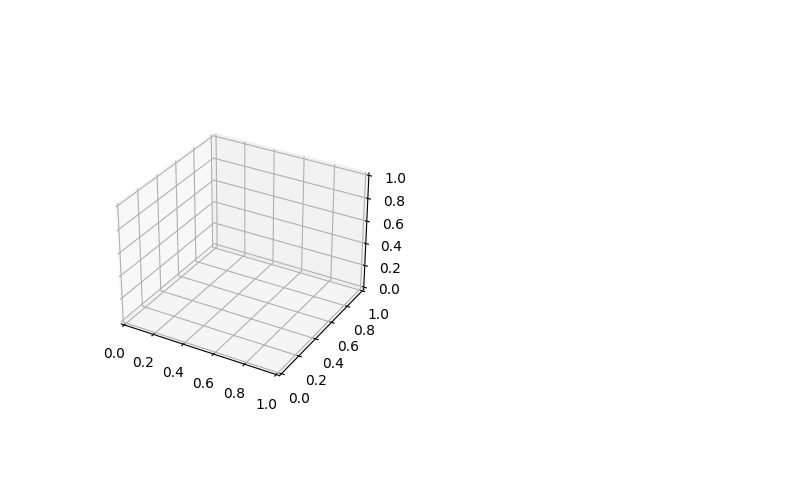

In [207]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(121,projection='3d')
#ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-1,1)
    
    ax1.clear()
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=200,color='y')
        ax.quiver(x,y,z,vx,vy,vz,length=0.03)
        
        ax.scatter(x,y,z,color='b')
        
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)